In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import sys
sys.path.append(os.path.abspath("../../src"))   
import soporte_regresion as f
pd.options.display.float_format = "{:,.2f}".format 
pd.set_option("display.max_columns", None)

In [2]:
df_encoded=pd.read_csv("../../datos/datos4/datos_sin_outliers_iterativo.csv", index_col=0).reset_index(drop=True)

In [3]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Columns: 102 entries, price to district_desconocido_MinMax
dtypes: float64(102)
memory usage: 275.1 KB


In [4]:
df_encoded.head()

,price,size_MinMax,rooms_MinMax,municipality_MinMax,distance_MinMax,status_MinMax,floor_MinMax,hasLift_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,bathrooms_1_MinMax,bathrooms_2_MinMax,bathrooms_3_MinMax,district_Alcobendas Centro_MinMax,district_Arganzuela_MinMax,district_Barajas_MinMax,district_Barrio de Salamanca_MinMax,district_Buenavista_MinMax,district_Carabanchel_MinMax,district_Carlos Ruiz_MinMax,district_Casco Antiguo_MinMax,district_Casco Histórico_MinMax,district_Casco Urbano_MinMax,district_Centro_MinMax,district_Centro - Casco Histórico_MinMax,district_Centro Urbano_MinMax,district_Chamartín_MinMax,district_Chamberí_MinMax,district_Chorrillo_MinMax,district_Ciudad 70_MinMax,district_Ciudad Lineal_MinMax,district_Dehesa - El Soto_MinMax,district_El Mirador_MinMax,district_El Mirador - Grillero_MinMax,district_El Nido-Las Fuentes_MinMax,district_Ensanche_MinMax,district_Espartales_MinMax,district_Foso-Moreras_MinMax,district_Fuencarral_MinMax,district_Fuentebella-San Felix-El Leguario_MinMax,district_Getafe Centro_MinMax,district_Getafe norte_MinMax,district_Hortaleza_MinMax,district_Hospital_MinMax,district_Juan de Austria_MinMax,district_La Alhóndiga_MinMax,district_La Dehesa - El Pinar_MinMax,district_La Espinilla - Parque Blanco_MinMax,district_Las Américas_MinMax,district_Las Matas- Peñascales_MinMax,district_Las Sedas - El Olivar_MinMax,district_Latina_MinMax,district_Los Llanos - Valle Pardo_MinMax,district_Moncloa_MinMax,district_Montserrat - Parque Empresarial_MinMax,district_Noroeste_MinMax,district_Nuevo Aranjuez-Ciudad de las Artes_MinMax,district_Parla Este_MinMax,district_Parque Europa - Los Pitufos_MinMax,district_Parque Inlasa_MinMax,district_Parque Roma - Coronas_MinMax,district_Parque de la Coruña - Las Suertes_MinMax,district_Pintores-Ferial_MinMax,district_Pol. Industrial sur_MinMax,district_Pryconsa - Poligono Europa_MinMax,district_Puente de Vallecas_MinMax,district_Retiro_MinMax,district_Reyes_MinMax,district_Reyes Católicos_MinMax,district_Rivas Futura_MinMax,district_San Blas_MinMax,district_San Crispín - La Estación Consorcio_MinMax,district_San Isidro_MinMax,district_San Isidro - Los Almendros_MinMax,district_San José - Buenos Aires_MinMax,district_Sudeste Industrial_MinMax,district_Suroeste_MinMax,district_Tetuán_MinMax,district_Universidad_MinMax,district_Usera_MinMax,district_Val_MinMax,district_Valdemorillo pueblo_MinMax,district_Valdepelayo - Montepinos - Arroyo Culebro_MinMax,district_Valderas - Los Castillos_MinMax,district_Valleaguado - La Cañada_MinMax,district_Vega de la Moraleja_MinMax,district_Vicálvaro_MinMax,district_Villa de Vallecas_MinMax,district_Villalba Estación_MinMax,district_Villaverde_MinMax,district_Villayuventus-Renfe_MinMax,district_Zona Estación_MinMax,district_Zona Estación- Centro_MinMax,district_Zona Industrial_MinMax,district_Zona Pueblo_MinMax,district_desconocido_MinMax
0,750.00,0.35,0.00,1.00,0.12,1.00,0.66,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,750.00,0.44,0.59,0.92,0.28,1.00,0.17,0.38,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

Separamos en x e y

In [5]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [6]:
x.head()

,size_MinMax,rooms_MinMax,municipality_MinMax,distance_MinMax,status_MinMax,floor_MinMax,hasLift_MinMax,propertyType_chalet_MinMax,propertyType_countryHouse_MinMax,propertyType_duplex_MinMax,propertyType_flat_MinMax,propertyType_penthouse_MinMax,propertyType_studio_MinMax,exterior_False_MinMax,exterior_True_MinMax,bathrooms_1_MinMax,bathrooms_2_MinMax,bathrooms_3_MinMax,district_Alcobendas Centro_MinMax,district_Arganzuela_MinMax,district_Barajas_MinMax,district_Barrio de Salamanca_MinMax,district_Buenavista_MinMax,district_Carabanchel_MinMax,district_Carlos Ruiz_MinMax,district_Casco Antiguo_MinMax,district_Casco Histórico_MinMax,district_Casco Urbano_MinMax,district_Centro_MinMax,district_Centro - Casco Histórico_MinMax,district_Centro Urbano_MinMax,district_Chamartín_MinMax,district_Chamberí_MinMax,district_Chorrillo_MinMax,district_Ciudad 70_MinMax,district_Ciudad Lineal_MinMax,district_Dehesa - El Soto_MinMax,district_El Mirador_MinMax,district_El Mirador - Grillero_MinMax,district_El Nido-Las Fuentes_MinMax,district_Ensanche_MinMax,district_Espartales_MinMax,district_Foso-Moreras_MinMax,district_Fuencarral_MinMax,district_Fuentebella-San Felix-El Leguario_MinMax,district_Getafe Centro_MinMax,district_Getafe norte_MinMax,district_Hortaleza_MinMax,district_Hospital_MinMax,district_Juan de Austria_MinMax,district_La Alhóndiga_MinMax,district_La Dehesa - El Pinar_MinMax,district_La Espinilla - Parque Blanco_MinMax,district_Las Américas_MinMax,district_Las Matas- Peñascales_MinMax,district_Las Sedas - El Olivar_MinMax,district_Latina_MinMax,district_Los Llanos - Valle Pardo_MinMax,district_Moncloa_MinMax,district_Montserrat - Parque Empresarial_MinMax,district_Noroeste_MinMax,district_Nuevo Aranjuez-Ciudad de las Artes_MinMax,district_Parla Este_MinMax,district_Parque Europa - Los Pitufos_MinMax,district_Parque Inlasa_MinMax,district_Parque Roma - Coronas_MinMax,district_Parque de la Coruña - Las Suertes_MinMax,district_Pintores-Ferial_MinMax,district_Pol. Industrial sur_MinMax,district_Pryconsa - Poligono Europa_MinMax,district_Puente de Vallecas_MinMax,district_Retiro_MinMax,district_Reyes_MinMax,district_Reyes Católicos_MinMax,district_Rivas Futura_MinMax,district_San Blas_MinMax,district_San Crispín - La Estación Consorcio_MinMax,district_San Isidro_MinMax,district_San Isidro - Los Almendros_MinMax,district_San José - Buenos Aires_MinMax,district_Sudeste Industrial_MinMax,district_Suroeste_MinMax,district_Tetuán_MinMax,district_Universidad_MinMax,district_Usera_MinMax,district_Val_MinMax,district_Valdemorillo pueblo_MinMax,district_Valdepelayo - Montepinos - Arroyo Culebro_MinMax,district_Valderas - Los Castillos_MinMax,district_Valleaguado - La Cañada_MinMax,district_Vega de la Moraleja_MinMax,district_Vicálvaro_MinMax,district_Villa de Vallecas_MinMax,district_Villalba Estación_MinMax,district_Villaverde_MinMax,district_Villayuventus-Renfe_MinMax,district_Zona Estación_MinMax,district_Zona Estación- Centro_MinMax,district_Zona Industrial_MinMax,district_Zona Pueblo_MinMax,district_desconocido_MinMax
0,0.35,0.00,1.00,0.12,1.00,0.66,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.44,0.59,0.92,0.28,1.00,0.17,0.38,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [7]:
y.head()

,price
0,750.00
1,750.00
2,590.00
3,684.00
4,600.00


Separamos en train y test y le hacemos aprender

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [9]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

In [10]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [11]:
metricas_pd=pd.DataFrame(metricas)

In [12]:
metricas_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.60,25.85,"1,335.40",36.54
test,"-273,858,273,990,714,209,599,488.00","3,644,198,832,213.55","1,030,513,290,627,040,501,171,224,576.00","32,101,608,847,954.03"


In [13]:
metricas_pd.reset_index(inplace=True)

In [14]:
metricas_pd.T

,0,1,2,3
index,r2_score,MAE,MSE,RMSE
train,0.60,25.85,"1,335.40",36.54
test,"-273,858,273,990,714,209,599,488.00","3,644,198,832,213.55","1,030,513,290,627,040,501,171,224,576.00","32,101,608,847,954.03"


Dado que coinciden bastante las RMSE, no se está dando un gran over fitting 

Vamos a intentar visualizar las cositas

In [15]:
predytets=pd.DataFrame(y_test_pred, columns=["y_test_pred"])

In [16]:
predytrain=pd.DataFrame(y_train_pred, columns=["y_train_pred"])

In [17]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytets, predytrain, y], ignore_index=True, axis=1)

In [18]:
df_fin.columns= ["test pre", "train pre", "precio"]

In [19]:
df_fin.reset_index(inplace=True)

VOY A PROBAR COGIENDO UN 80 DE ENTRENAMIENTO

In [20]:
x_train80, x_test80, y_train80, y_test80 = train_test_split(x, y, train_size= 0.8, random_state=42)
modelo_lineal80= LinearRegression()
modelo_lineal80.fit(x_train80, y_train80) 

LinearRegression()

Ahora hacemos la predicción

In [21]:
y_test_pred80=modelo_lineal80.predict(x_test80)         #con esto predice un precio
y_train_pred80= modelo_lineal80.predict(x_train80)

In [22]:
metricas80 = {
    'train': {
        'r2_score': r2_score(y_train80, y_train_pred80),
        'MAE': mean_absolute_error(y_train80, y_train_pred80),
        'MSE': mean_squared_error(y_train80, y_train_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_train80, y_train_pred80))
    },
    'test': {
        'r2_score': r2_score(y_test80, y_test_pred80),
        'MAE': mean_absolute_error(y_test80, y_test_pred80),
        'MSE': mean_squared_error(y_test80, y_test_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_test80, y_test_pred80))

    }
}

In [23]:
metricas80_pd=pd.DataFrame(metricas80)

In [24]:
metricas80_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.61,25.47,"1,275.47",35.71
test,"-1,205,891,773,787,954,237,931,520.00","9,675,912,332,495.49","4,955,396,571,866,290,686,103,912,448.00","70,394,577,716,371.67"


In [25]:
metricas80_pd.reset_index(inplace=True)

In [26]:
metricas80_pd

,index,train,test
0,r2_score,0.61,"-1,205,891,773,787,954,237,931,520.00"
1,MAE,25.47,"9,675,912,332,495.49"
2,MSE,"1,275.47","4,955,396,571,866,290,686,103,912,448.00"
3,RMSE,35.71,"70,394,577,716,371.67"


Se está dando over fitting y under fitting asi que mejor el de 70% train 30% test

Vamos a intentar visualizar las cositas

In [27]:
predytets80=pd.DataFrame(y_test_pred80, columns=["y_test_pred80"])

In [28]:
predytrain80=pd.DataFrame(y_train_pred80, columns=["y_train_pred80"])

In [29]:
df_fin80=pd.DataFrame()
df_fin80=pd.concat([df_fin80, predytets80, predytrain80, y], ignore_index=True, axis=1)

In [30]:
df_fin80.columns= ["test pre80", "train pre80", "precio"]

In [31]:
df_fin80.reset_index(inplace=True)

<Figure size 1000x800 with 0 Axes>

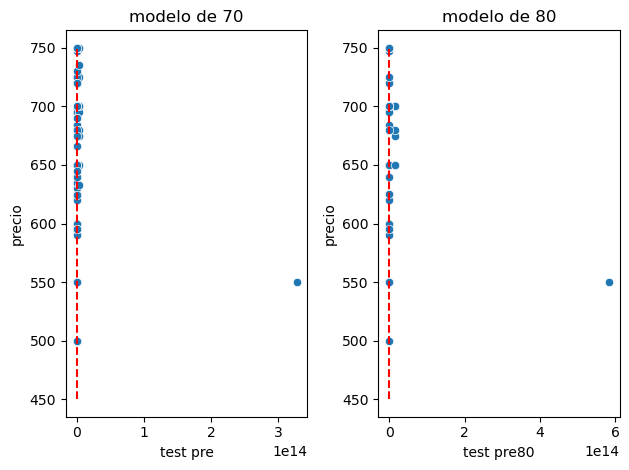

In [32]:
plt.figure(figsize=(10,8))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat

sns.scatterplot(x="test pre", y="precio", data= df_fin, ax=axes[0])
axes[0].plot([df_fin["precio"].min(), df_fin["precio"].max()],
         [df_fin["precio"].min(), df_fin["precio"].max()],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="test pre80", y="precio", data= df_fin80, ax= axes[1])
axes[1].plot([df_fin80["precio"].min(), df_fin80["precio"].max()],
         [df_fin80["precio"].min(), df_fin80["precio"].max()],
         color='red', linestyle='--', label='x = y')
axes[1].set_title("modelo de 80")
plt.tight_layout()

In [33]:
metricas_pd

,index,train,test
0,r2_score,0.60,"-273,858,273,990,714,209,599,488.00"
1,MAE,25.85,"3,644,198,832,213.55"
2,MSE,"1,335.40","1,030,513,290,627,040,501,171,224,576.00"
3,RMSE,36.54,"32,101,608,847,954.03"


In [34]:
metricas80_pd

,index,train,test
0,r2_score,0.61,"-1,205,891,773,787,954,237,931,520.00"
1,MAE,25.47,"9,675,912,332,495.49"
2,MSE,"1,275.47","4,955,396,571,866,290,686,103,912,448.00"
3,RMSE,35.71,"70,394,577,716,371.67"


DEFINITIVAMENTE, nos quedamos con el modelo de 70% train.

Creamos un dataframe con el valor real y los residuos para ambas formas de entrenar 

In [35]:
df_residuos= y_test_pred - y_test
df_residuos80= y_test_pred80 - y_test80

In [36]:
df_con_residuos=pd.DataFrame()
df_con_residuos=pd.concat([df_con_residuos,df_residuos, y_test], ignore_index=True, axis=1)

df_con_residuos80=pd.DataFrame()
df_con_residuos80=pd.concat([df_con_residuos80,df_residuos80, y_test80], ignore_index=True, axis=1)

In [37]:
df_con_residuos.columns=["residuo", "precio original"]
df_con_residuos80.columns=["residuo80", "precio original80"]

In [38]:
df_con_residuos.head()

,residuo,precio original
194,-2.56,620.00
157,-43.62,750.00
225,-45.50,740.00
208,27.25,650.00
319,29.94,650.00


In [39]:
df_con_residuos80.head()

,residuo80,precio original80
194,-6.38,620.00
157,-40.00,750.00
225,-45.00,740.00
208,31.25,650.00
319,33.88,650.00


<Figure size 1000x1800 with 0 Axes>

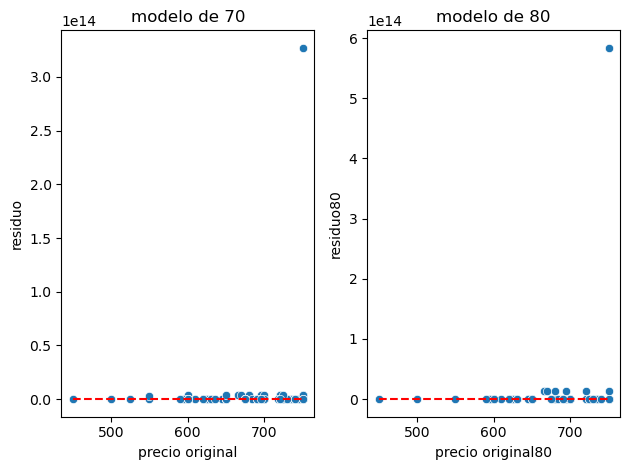

In [40]:
plt.figure(figsize=(10,18))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat


sns.scatterplot(x="precio original", y="residuo", data= df_con_residuos, ax= axes[0])
axes[0].plot([df_con_residuos["precio original"].min(), df_con_residuos["precio original"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="precio original80", y="residuo80", data= df_con_residuos80, ax=axes[1])
axes[1].plot([df_con_residuos80["precio original80"].min(), df_con_residuos80["precio original80"].max()],
         [0,0],
         color='red', linestyle='--', label='x = y')

axes[1].set_title("modelo de 80")
plt.tight_layout()

Aquí observamos como los residuos se alejan de la línea 0 que representa que no haya diferencias entre los valores predichos y los valores reales

# **Evidentemente este modelo ya ni lo continúo**